### EDA for NFL and NBA Fantasy Stats
* The NFL database that I scraped already had the Fantasy points calculated, so the goal will be to find the population mean, and the sample means for each year. Probably will break down each year by position as well to get a more general idea
* The NBA database did not have Fantasy points already calculated, so I will be creating a column that does the calculations for me and will likely analyze the data in a similar process to the NFL data. 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np 
%matplotlib inline

### Reading in NFL and NBA CSVs

In [3]:
nfl = pd.read_csv('data/nfl/Master_NFL.csv', index_col= 'Unnamed: 0')
nba = pd.read_csv('data/nba/Master_NBA.csv', index_col= 'Unnamed: 0')
print(nfl.head())
print(nba.head())
#cleaning nfl player column
nfl['Player'] = nfl['Player'].apply(lambda x: x.replace('*', '').replace('+', '').strip())

2PM  2PP   Age  Att  Att.1  Cmp   DKPt   FDPt   FL FantPos  ...  TD.3  Tgt  \
0  0.0  0.0  23.0  0.0  263.0  0.0  274.9  242.4  0.0      RB  ...  12.0  0.0   
1  0.0  0.0  26.0  0.0    4.0  0.0  255.3  215.8  0.0      WR  ...  13.0  0.0   
2  0.0  0.0  23.0  0.0    0.0  0.0  238.0  208.5  0.0      WR  ...  12.0  0.0   
3  0.0  0.0  26.0  0.0    4.0  0.0  220.3  195.3  0.0      WR  ...  12.0  0.0   
4  0.0  0.0  28.0  0.0  206.0  0.0  249.2  226.2  0.0      RB  ...  13.0  0.0   

    Tm    VBD   Y/A    Y/R  Yds   Yds.1   Yds.2  Year  
0  NYG  136.0  3.90  10.15  0.0  1027.0   487.0  1970  
1  CHI  134.0  4.25  14.45  0.0    17.0  1026.0  1970  
2  SFO  134.0  0.00  20.75  0.0     0.0  1100.0  1970  
3  SDG  124.0  1.75  22.86  0.0     7.0  1006.0  1970  
4  STL  123.0  4.74  11.41  0.0   977.0   365.0  1970  

[5 rows x 32 columns]
                Player Pos   Age   Tm     G   GS      MP     FG     FGA  \
0      Zaid Abdul-Aziz   C  30.0  BUF  22.0  0.0   195.0   25.0    74.0   
1  Kare

### Creating NBA Fantasy Points Column

In [4]:
nba.columns

Index(['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Year'],
      dtype='object')

In [5]:
nba['FantPt'] = (nba['PTS'] + nba['TRB']*1.2 + nba['AST']*1.5 + nba['STL']*3 + nba['BLK']*3 - nba['TOV'])
nba['FPPG'] = (nba['PTS'] + nba['TRB']*1.2 + nba['AST']*1.5 + nba['STL']*3 + nba['BLK']*3 - nba['TOV'])/ nba['G']
#checking to make sure formula works- checking against NBA.com fantasy site. Looks like our numbers are close, difference is probably accounted for in the rounding
#also this is a total column, I will probably want to make a per game column as well. 
nba[nba.Player == 'Stephen Curry'][['FantPt', 'FPPG', 'Year']]

FantPt       FPPG  Year
12684  2804.2  35.052500  2010
13128  2525.2  34.124324  2011
13580   771.6  29.676923  2012
14053  3145.3  40.324359  2013
14534  3404.8  43.651282  2014
15015  3525.7  44.071250  2015
15500  3971.5  50.272152  2016
15969  3446.6  43.627848  2017
16477  2235.2  43.827451  2018
17021  3024.3  43.830435  2019

In [6]:
nba.sort_values('G', ascending = False).head(15)

Player    Pos   Age   Tm     G    GS      MP     FG  \
118          Tom Henderson     PG  25.0  TOT  87.0   0.0  2791.0  371.0   
8265         Chris Gatling     PF  32.0  TOT  85.0   0.0  1811.0  365.0   
10206         Theo Ratliff      C  30.0  TOT  85.0  83.0  2664.0  266.0   
9870   Shareef Abdur-Rahim     PF  27.0  TOT  85.0  56.0  2684.0  501.0   
1381          Dave Robisch      C  31.0  TOT  84.0   0.0  2116.0  330.0   
1642         Mike Mitchell     SF  26.0  TOT  84.0  83.0  3063.0  753.0   
1059          Billy Paultz      C  31.0  TOT  84.0   0.0  2193.0  327.0   
1331        Billy McKinney     PG  25.0  TOT  84.0   0.0  2166.0  327.0   
4812          Thurl Bailey     PF  30.0  TOT  84.0  18.0  2104.0  368.0   
3398         Tyrone Corbin     SF  25.0  TOT  84.0   5.0  1739.0  257.0   
10524       Casey Jacobsen  SG-SF  23.0  TOT  84.0   1.0  1798.0  165.0   
8751          Mark Jackson     PG  35.0  TOT  83.0  82.0  2588.0  244.0   
9748           James Posey     SF  26.0  TOT  83.0  71.0  2518.0  309.0   
6400       Benoit Benjamin      C  31.0  TOT  83.0  71.0  1896.0  294.0   
14810       Ramon Sessions     PG  27.0  TOT  83.0  19.0  2214.0  330.0   

          FGA    FG%  ...    TRB    AST    STL    BLK    TOV     PF     PTS  \
118     826.0  0.449  ...  239.0  598.0  138.0   17.0    0.0  148.0   975.0   
8265    802.0  0.455  ...  502.0   71.0   82.0   23.0  169.0  246.0  1014.0   
10206   549.0  0.485  ...  614.0   71.0   54.0  307.0  120.0  300.0   672.0   
9870   1054.0  0.475  ...  639.0  174.0   68.0   37.0  184.0  222.0  1384.0   
1381    740.0  0.446  ...  499.0  173.0   37.0   34.0   83.0  173.0   860.0   
1642   1477.0  0.510  ...  590.0   82.0   60.0   43.0  153.0  277.0  1726.0   
1059    673.0  0.486  ...  586.0  188.0   69.0   84.0  115.0  213.0   763.0   
1331    645.0  0.507  ...  184.0  360.0   99.0   11.0  158.0  231.0   818.0   
4812    836.0  0.440  ...  485.0   78.0   35.0  117.0  108.0  160.0   951.0   
3398    525.0  0.490  ...  350.0  115.0   72.0   18.0  104.0  181.0   625.0   
10524   408.0  0.404  ...  167.0  113.0   33.0    8.0   71.0  104.0   547.0   
8751    583.0  0.419  ...  305.0  661.0   84.0    7.0  175.0  139.0   631.0   
9748    752.0  0.411  ...  426.0  184.0  106.0   15.0  144.0  197.0   893.0   
6400    590.0  0.498  ...  539.0   64.0   45.0   85.0  144.0  224.0   728.0   
14810   769.0  0.429  ...  203.0  340.0   49.0    9.0  148.0   90.0  1021.0   

       Year  FantPt       FPPG  
118    1977  2623.8  30.158621  
8265   2000  1868.9  21.987059  
10206  2004  2478.3  29.156471  
9870   2004  2542.8  29.915294  
1381   1981  1848.3  22.003571  
1642   1982  2713.0  32.297619  
1059   1980  2092.2  24.907143  
1331   1981  1750.8  20.842857  
4812   1992  1998.0  23.785714  
3398   1988  1383.5  16.470238  
10524  2005   968.9  11.534524  
8751   2001  2086.5  25.138554  
9748   2003  1899.2  22.881928  
6400   1996  1716.8  20.684337  
14810  2014  1800.6  21.693976  

[15 rows x 32 columns]

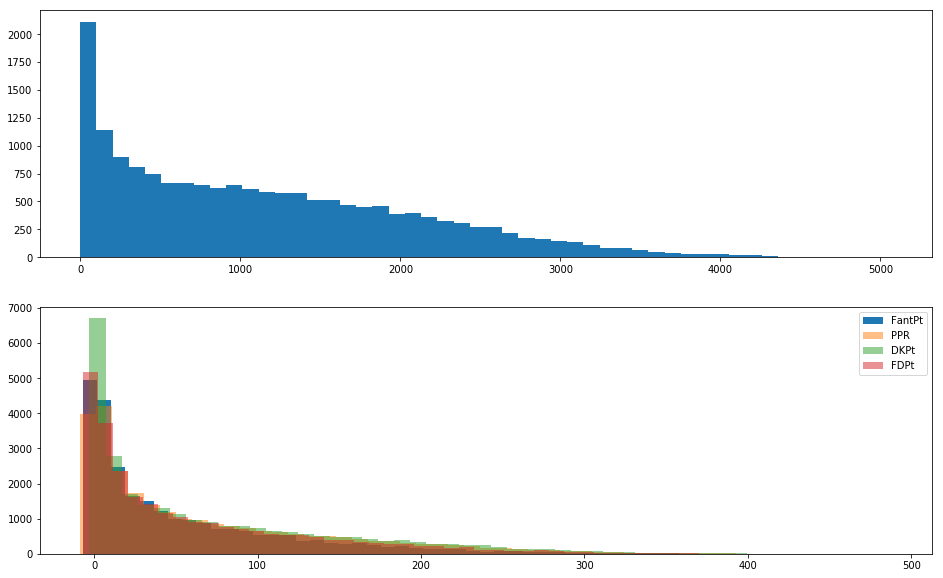

In [18]:
fig, ax = plt.subplots(2,1, figsize= (16,10))
ax[0].hist(nba.FantPt, bins = 50)
ax[1].hist(nfl.FantPt, bins = 50)
ax[1].hist(nfl.PPR, bins = 50, alpha = 0.5)
ax[1].hist(nfl.DKPt, bins = 50, alpha = 0.5)
ax[1].hist(nfl.FDPt, bins = 50, alpha = 0.5)
ax[1].legend(loc = 'best')
#need to figure out what kind of distrubtion this is

In [41]:
#need to add MVP column for the MVP each year, probably could have snagged this while scapping because it was on each page as I scraped
mvp_lst = [[2019, 'Lamar Jackson'], [2018, 'Patrick Mahomes'], [2017, 'Tom Brady'], 
[2016, 'Matt Ryan'], [2015, 'Cam Newton'], [2014, 'Aaron Rodgers'], [2013, 'Peyton Manning'], [2012, 'Adrian Peterson'], [2011, 'Aaron Rodgers'], [2010, 'Tom Brady'], 
[2009, 'Peyton Manning'], [2008, 'Peyton Manning'], [2007, 'Tom Brady'], [2006, 'LaDainian Tomlinson'], [2005, 'Shaun Alexander'], [2004, 'Peyton Manning'], [2003, 'Steve McNair'], 
[2003, 'Peyton Manning'], [2002, 'Rich Gannon'], [2001, 'Kurt Warner'], [2000, 'Marshall Faulk'], [1999, 'Kurt Warner'], [1998, 'Terrell Davis'], [1997, 'Barry Sanders'], 
[1997, 'Brett Favre'], [1996, 'Brett Favre'], [1995, 'Brett Favre'], [1994, 'Steve Young'], [1993, 'Emmitt Smith'], [1992, 'Steve Young'], [1991, 'Thurman Thomas'], 
[1990, 'Joe Montana'], [1989, 'Joe Montana'], [1988, 'Boomer Esiason'], [1987, 'John Elway'], [1986, 'Eric Dickerson'], [1985, 'Marcus Allen'], [1984, 'Dan Marino'], 
[1983, 'Joe Theismann'], [1982, 'Dan Fouts'], [1981, 'Ken Anderson'], [1980, 'Brian Sipe'], [1979, 'Earl Campbell'], [1978, 'Terry Bradshaw'], [1977, 'Walter Payton'], 
[1976, 'Bert Jones'], [1975, 'Fran Tarkenton'], [1974, 'Ken Stabler'], [1973, 'O.J. Simpson'], [1972, 'Larry Brown'], [1971, 'Bob Griese'], [1970, 'John Brodie']]
nfl['mvp'] = False
for idx,row in nfl.iterrows():
    for lst in mvp_lst:
        if row['Player'] == lst[1] and row['Year'] == lst[0]:
            nfl.loc[idx, 'mvp'] = True


In [362]:
nfl_mvp_years = [i[0] for i in mvp_lst[::-1]]
print(nfl_mvp_years)
#print(nfl[nfl.mvp == True][['Player', 'FantPos', 'Year','FantPt', 'PPR']])

[1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]


In [48]:
#NBA MVP Column
nba_mvp = [[2019, 'Giannis Antetokounmpo'], [2018, 'James Harden'], [2017, 'Russell Westbrook'],
[2016, 'Stephen Curry'], [2015, 'Stephen Curry'], [2014, 'Kevin Durant'], [2013, 'LeBron James'], [2012, 'LeBron James'], [2011, 'Derrick Rose'],
[2010, 'LeBron James'], [2009, 'LeBron James'], [2008, 'Kobe Bryant'], [2007, 'Dirk Nowitzki'], [2006, 'Steve Nash'], [2005, 'Steve Nash'], [2004, 'Kevin Garnett'],
[2003, 'Tim Duncan'], [2002, 'Tim Duncan'], [2001, 'Allen Iverson'], [2000, "Shaquille O'Neal"], [1999, 'Karl Malone'], [1998, 'Michael Jordan'], [1997, 'Karl Malone'],
[1996, 'Michael Jordan'], [1995, 'David Robinson'], [1994, 'Hakeem Olajuwon'], [1993, 'Charles Barkley'], [1992, 'Michael Jordan'], [1991, 'Michael Jordan'],
[1990, 'Magic Johnson'], [1989, 'Magic Johnson'], [1988, 'Michael Jordan'], [1987, 'Magic Johnson'], [1986, 'Larry Bird'], [1985, 'Larry Bird'], [1984, 'Larry Bird'],
[1983, 'Moses Malone'], [1982, 'Moses Malone'], [1981, 'Julius Erving'], [1980, 'Kareem Abdul-Jabbar'], [1979, 'Moses Malone'], [1978, 'Bill Walton'], [1977, 'Kareem Abdul-Jabbar']]

nba['mvp'] = False
for idx,row in nba.iterrows():
    for lst in nba_mvp:
        if row['Player'] == lst[1] and row['Year'] == lst[0]:
            nba.loc[idx, 'mvp'] = True

In [521]:
nba_mvp_years = [i[0] for i in nba_mvp[::-1]]
print(nba_mvp_years)

[1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]


In [49]:
print(nba[nba.mvp == True][['Player', 'Pos', 'Year','FantPt', 'FPPG']])

Player Pos  Year  FantPt       FPPG
1        Kareem Abdul-Jabbar   C  1977  5024.5  61.274390
554              Bill Walton   C  1978  2864.7  49.391379
742             Moses Malone   C  1979  4252.3  51.857317
858      Kareem Abdul-Jabbar   C  1980  4439.7  54.142683
1225           Julius Erving  SF  1981  4042.4  49.297561
1627            Moses Malone   C  1982  4467.6  55.155556
1930            Moses Malone   C  1983  3966.3  50.850000
2084              Larry Bird  PF  1984  4045.2  51.205063
2392              Larry Bird  SF  1985  4534.9  56.686250
2708              Larry Bird  SF  1986  4301.5  52.457317
3142           Magic Johnson  PG  1987  4201.3  52.516250
3488          Michael Jordan  SG  1988  5052.3  61.613415
3828           Magic Johnson  PG  1989  4108.4  53.355844
4186           Magic Johnson  PG  1990  3960.9  50.137975
4579          Michael Jordan  SG  1991  4565.9  55.681707
4969          Michael Jordan  SG  1992  4321.7  54.021250
5199         Charles Barkley  PF  19

In [101]:
#Making NFL Categories for hypothesis testing:
#Setting Threshhold for at least starting in 50% of games: 8 games for NFL, 41 Games for NBA
nfl_gp= nfl[nfl.GS >= 8]
nfl_gp= nfl_gp[['Player', 'Year', 'FantPos', 'FantPt', 'PPR', 'DKPt', 'FDPt',
         'G', 'GS', 'Tm', 'VBD','mvp']]
nfl_gp.loc[17089, 'FantPos'] = 'RB'
nfl_gp.loc[19440, 'FantPos'] = 'WR'
nfl_gp.loc[20089, 'FantPos'] = 'WR'
nfl_gp= nfl_gp[nfl_gp.FantPos != '?']
nfl_gp= nfl_gp[nfl_gp.FantPt != 0]


# for year, data in nfl_gp.groupby('Year')[['FantPt', 'PPR']]:
#     print(data)
#print(nfl_gp[nfl_gp.mvp == True][['Year', 'Player','FantPt', 'PPR']])


In [509]:
#Making NBA Categories for hypothesis testing:
#Setting Threshhold for at least starting in 50% of games: 8 games for NFL, 41 Games for NBA
nba_gp = nba[nba.G >= 41]
nba_gp = nba_gp[['Player', 'Pos', 'Tm', 'G', 'GS', 'Year', 'FantPt', 'FPPG', 'mvp']]




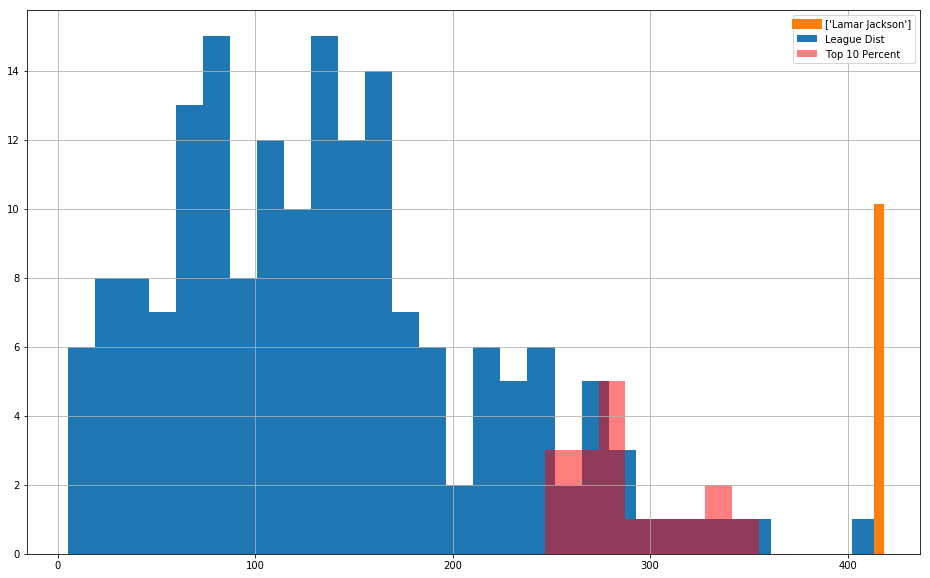

In [488]:
fig, ax = plt.subplots(figsize = (16,10))
nfl_gp[nfl_gp.Year == 2019].FantPt.hist(ax= ax, bins = 30, label = 'League Dist', align = 'mid')
ax.plot([nfl_gp[(nfl_gp.mvp == True) & (nfl_gp.Year == 2019)].FantPt.values for i in range(11)], list(range(11)), label = f"{nfl_gp[(nfl_gp.mvp == True) & (nfl_gp.Year == 2019)].Player.values}", lw= 10)
top_10_p= nfl_gp[(nfl_gp.mvp != True) & (nfl_gp.Year == 2019)].sort_values('FantPt', ascending = False).FantPt[:int(.1*len(nfl_gp[(nfl_gp.mvp != True) & (nfl_gp.Year == 2019)]))]
top_10_p.hist(ax = ax, alpha = 0.5, color = 'r', bins  = 8, label= 'Top 10 Percent')
#ax.bar(top_10_p, [5]*len(top_10_p), label = 'Top 10 %', color ='r', lw= 300, alpha = 0.5)
ax.legend();

''

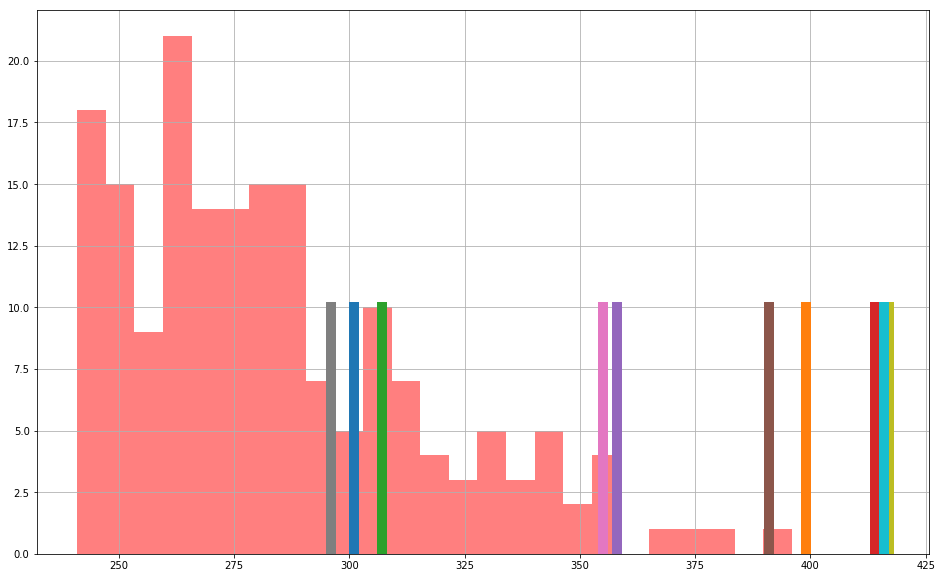

In [497]:
fig, ax = plt.subplots(figsize = (16,10))
#nfl_gp[nfl_gp.Year > 2009].FantPt.hist(ax= ax, bins = 30, label = 'League Dist', align = 'mid')
ax.plot([nfl_gp[(nfl_gp.mvp == True) & (nfl_gp.Year > 2009)].FantPt.values for i in range(11)], list(range(11)), label = f"{nfl_gp[(nfl_gp.mvp == True) & (nfl_gp.Year > 2009)].Player.values}", lw= 10)
top_10_p= nfl_gp[(nfl_gp.mvp != True) & (nfl_gp.Year > 2009)].sort_values('FantPt', ascending = False).FantPt[:int(.1*len(nfl_gp[(nfl_gp.mvp != True) & (nfl_gp.Year > 2009)]))]
top_10_p.hist(ax = ax, alpha = 0.5, color = 'r', bins  = 25, label= 'Top 10 Percent')
#ax.bar(top_10_p, [5]*len(top_10_p), label = 'Top 10 %', color ='r', lw= 300, alpha = 0.5)
#ax.legend()
;

Text(0.5, 0.98, 'NFL MVP vs TOP 10 Fantasy Points per Season')

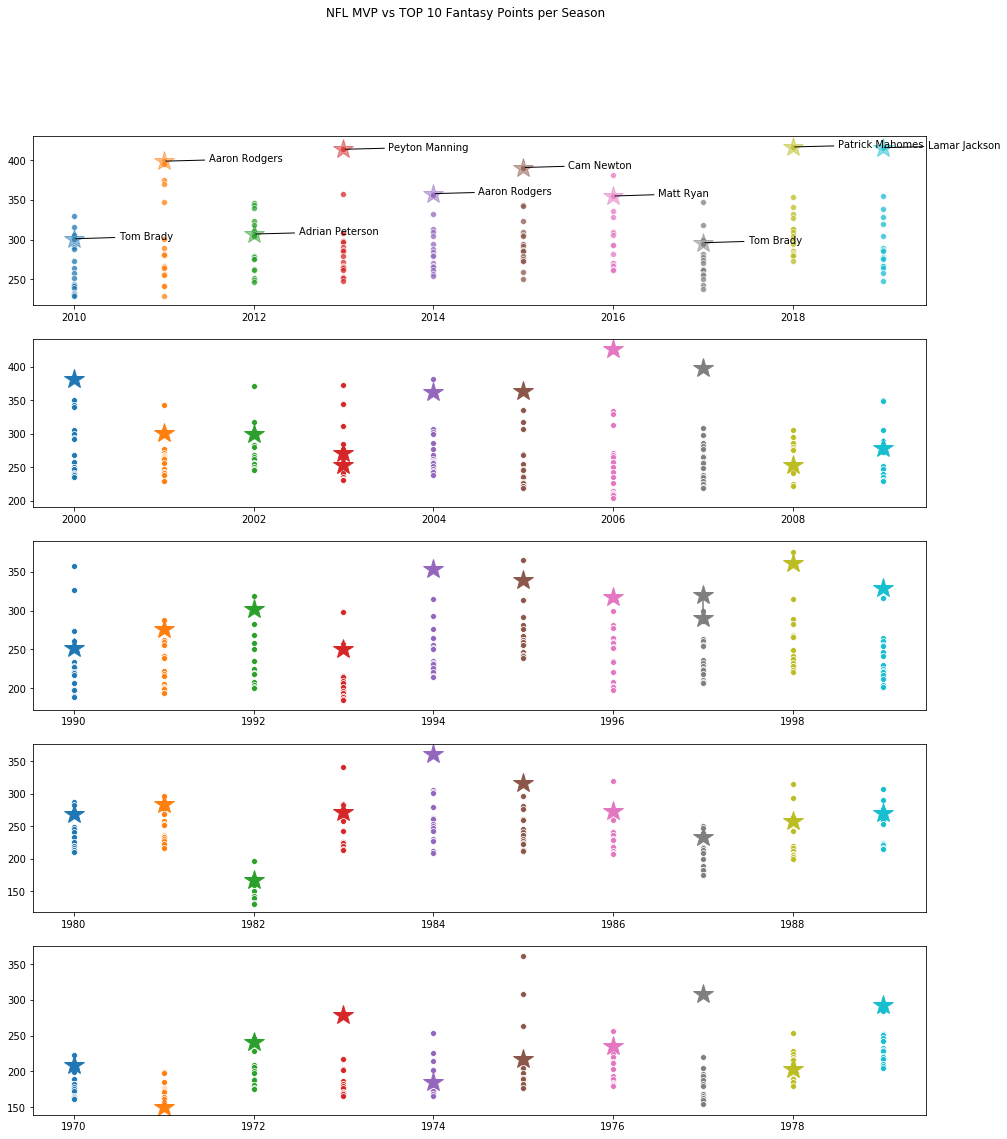

In [282]:
import seaborn as sns
fig, ax = plt.subplots(5,1, figsize=(16,18))
for i in range(2010, 2020):
    y = nfl_gp[nfl_gp.Year == i].sort_values('FantPt', ascending = False).FantPt[:int(.1*len(nfl_gp[nfl_gp.Year == i]))].values
    x= [i] * len(y)
    sns.scatterplot(x, y, ax=ax[0], alpha= 0.75)
for i in range(2010, 2020):
    y = nfl_gp[(nfl_gp.Year == i) & (nfl_gp.mvp == True)].FantPt.values
    x= i
    ax[0].plot(x, y, marker = '*', markersize= 20, alpha = 0.5)
    ax[0].annotate(nfl_gp[(nfl_gp.Year == i) & (nfl_gp.mvp == True)].Player.values[0], xy=(x, y), xytext=(x+0.5, y -1),
                arrowprops={'arrowstyle' : '-'})#'facecolor':'black', 'width':0.01, 'shrink':0.08})

def graph_mvp_top_10(start, stop, ax):
    for i in range(start, stop +1):
        y = nfl_gp[nfl_gp.Year == i].sort_values('FantPt', ascending = False).FantPt[:int(.1*len(nfl_gp[nfl_gp.Year == i]))].values
        x= [i] * len(y)
        sns.scatterplot(x, y , ax= ax)
    for i in range(start, stop +1):
        y = nfl_gp[(nfl_gp.Year == i) & (nfl_gp.mvp == True)].FantPt.values
        x= [i]*len(y)
        ax.plot(x, y, marker = '*', markersize= 20)
        #fix this to make it prettier:
        #ax[1].annotate(nfl_gp[(nfl_gp.Year == i) & (nfl_gp.mvp == True)].Player.values[0], xy=(x, y), xytext=(x[0]+0.5, y + 0.5),
                    #arrowprops={'facecolor':'black', 'width':0.1, 'shrink':0.08})
graph_mvp_top_10(2000,2009, ax[1])
graph_mvp_top_10(1990,1999, ax[2])
graph_mvp_top_10(1980,1989, ax[3])
graph_mvp_top_10(1970,1979, ax[4])
fig.suptitle('NFL MVP vs TOP 10 Fantasy Points per Season')
  

Text(0.5, 0.98, 'NFL MVP vs TOP 10 PPR Fantasy Points per Season')

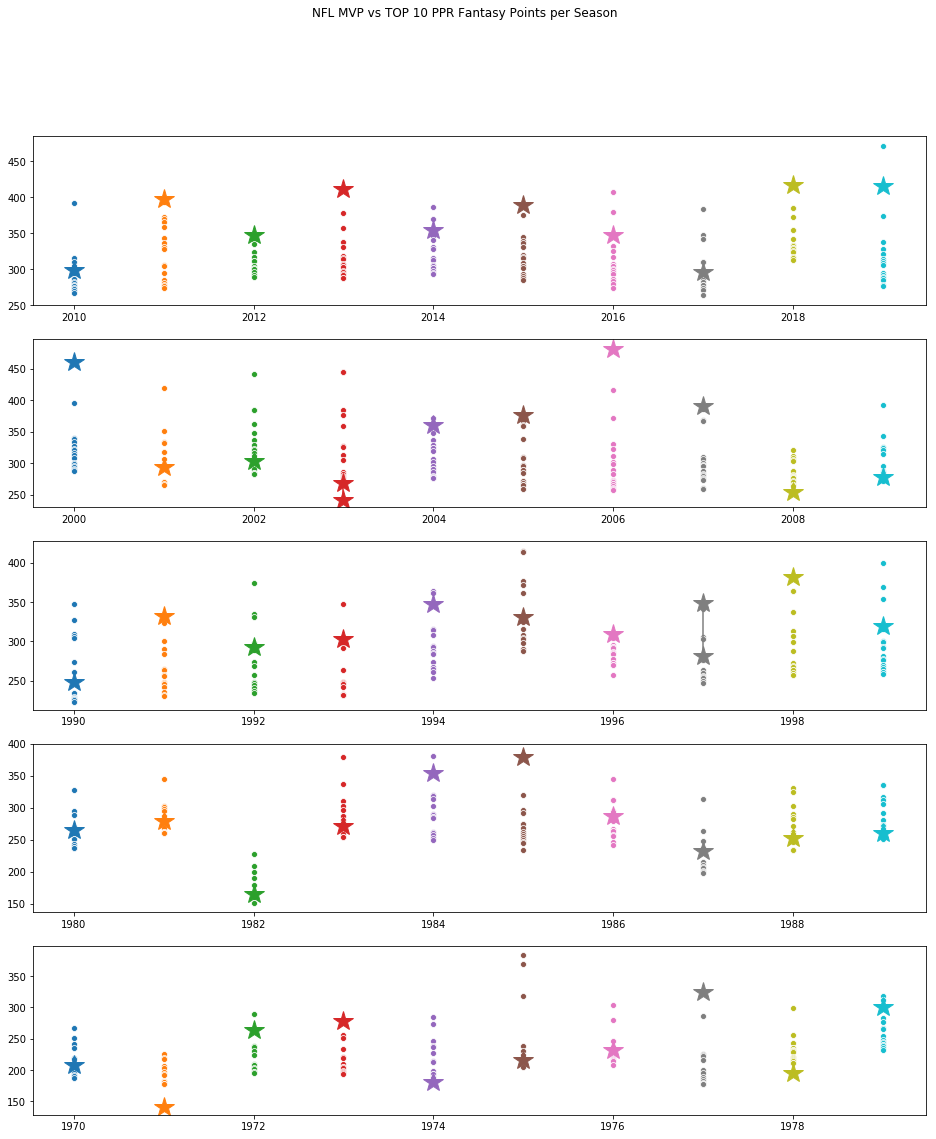

In [273]:

fig, ax = plt.subplots(5,1, figsize=(16,18))
def graph_mvp_top_10_ppr(start, stop, ax):
    for i in range(start, stop +1):
        y = nfl_gp[nfl_gp.Year == i].sort_values('PPR', ascending = False).PPR[:int(.1*len(nfl_gp[nfl_gp.Year == i]))].values
        x= [i] * len(y)
        sns.scatterplot(x, y , ax= ax)
    for i in range(start, stop +1):
        y = nfl_gp[(nfl_gp.Year == i) & (nfl_gp.mvp == True)].PPR.values
        x= [i]*len(y)
        ax.plot(x, y, marker = '*', markersize= 20)
graph_mvp_top_10_ppr(2010,2019, ax[0])
graph_mvp_top_10_ppr(2000,2009, ax[1])
graph_mvp_top_10_ppr(1990,1999, ax[2])
graph_mvp_top_10_ppr(1980,1989, ax[3])
graph_mvp_top_10_ppr(1970,1979, ax[4])
fig.suptitle('NFL MVP vs TOP 10 PPR Fantasy Points per Season')



Text(0.5, 0.98, 'NBA MVP vsTOP 10 Fantasy Points per Game for Season')

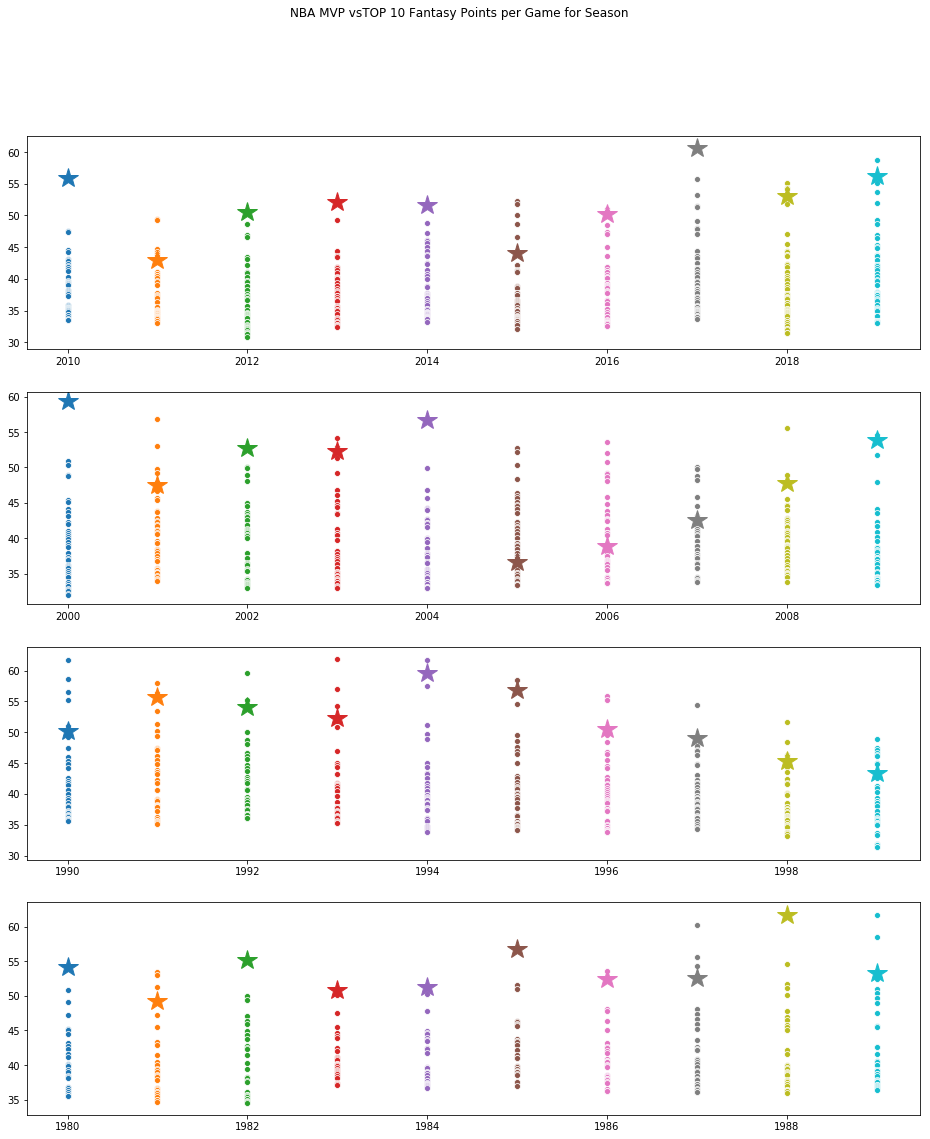

In [274]:
fig, ax = plt.subplots(4,1, figsize=(16,18))
def graph__nba_mvp_top_10(start, stop, ax):
    for i in range(start, stop +1):
        y = nba[nba.Year == i].sort_values('FPPG', ascending = False).FPPG[:int(.1*len(nba[nba.Year == i]))].values
        x= [i] * len(y)
        sns.scatterplot(x, y , ax= ax)
    for i in range(start, stop +1):
        y = nba[(nba.Year == i) & (nba.mvp == True)].FPPG.values
        x= [i]*len(y)
        ax.plot(x, y, marker = '*', markersize= 20)
graph__nba_mvp_top_10(2010,2019, ax[0])
graph__nba_mvp_top_10(2000,2009, ax[1])
graph__nba_mvp_top_10(1990,1999, ax[2])
graph__nba_mvp_top_10(1980,1989, ax[3])
fig.suptitle('NBA MVP vsTOP 10 Fantasy Points per Game for Season')


In [464]:
for i in [2010, 2012, 2016, 2017]:
    print(nfl_gp[nfl_gp.Year == i][['Player', 'Year', 'FantPt']].sort_values('FantPt', ascending = False)[0:3]['Player'].values[0])

Arian Foster
Drew Brees
Aaron Rodgers
Russell Wilson


[]

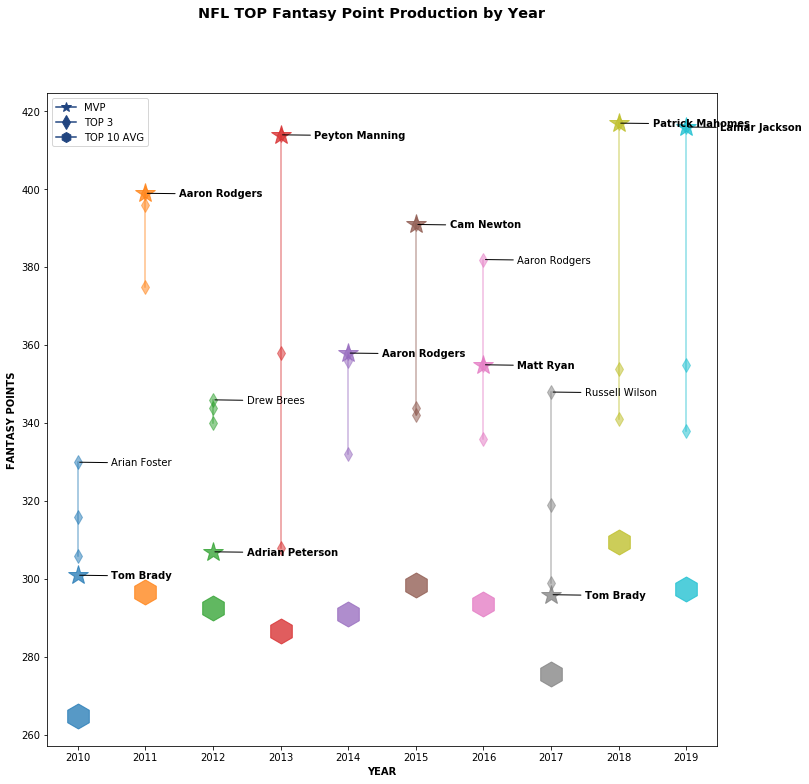

In [486]:
#Top 3 values
#nfl_gp[nfl_gp.Year == 2019][['Player', 'Year', 'FantPt']].sort_values('FantPt', ascending = False)[0:3]['Player'].values
#MVP values
#nfl_gp[(nfl_gp.Year == i) & (nfl_gp.mvp == True)].FantPt.values
#MVP Average each year
#mean_top2

fig, ax = plt.subplots(figsize=(12,12))
legend_elements = [Line2D([], [], markersize = 10, color='#214580', marker = '*', label='MVP'),
                   Line2D([], [], markersize = 10, marker='d', color='#214580', label='TOP 3'),
                   Line2D([], [], markersize = 10, marker='h', color='#214580', label='TOP 10 AVG')]
for i in range(2010, 2020):
    y = nfl_gp[nfl_gp.Year == i][['Player', 'Year', 'FantPt']].sort_values('FantPt', ascending = False)[0:3]['FantPt'].values
    x= [i] * len(y)
    ax.plot(x, y, marker = 'd', markersize= 10, alpha = 0.5)
years_2010 = [i for i in range(2010,2020)]
for idx, n in enumerate(mean_top2[-10:]):
    y = n 
    x = years_2010[idx]
    ax.plot(x,y, marker = 'h', markersize = 25, alpha = 0.75)

for i in range(2010, 2020):
    y = nfl_gp[(nfl_gp.Year == i) & (nfl_gp.mvp == True)].FantPt.values
    x= i
    ax.plot(x, y, marker = '*', markersize= 20, alpha = 0.75)
    ax.annotate(nfl_gp[(nfl_gp.Year == i) & (nfl_gp.mvp == True)].Player.values[0], xy=(x, y), xytext=(x+0.5, y -1),
                arrowprops={'arrowstyle' : '-'}, fontweight = 'bold')

for i in [2010, 2012, 2016, 2017]:
    y = nfl_gp[nfl_gp.Year == i][['Player', 'Year', 'FantPt']].sort_values('FantPt', ascending = False)[0:3]['FantPt'].values[0]
    x = i
    ax.annotate(nfl_gp[nfl_gp.Year == i][['Player', 'Year', 'FantPt']].sort_values('FantPt', ascending = False)[0:3]['Player'].values[0], xy=(x, y), xytext= (x + 0.5, y -1),
                arrowprops={'arrowstyle' : '-'})


ax.legend(handles=legend_elements)
fig.suptitle('NFL TOP Fantasy Point Production by Year', fontweight = 'bold', fontsize = 'x-large')
ax.set_xlabel('YEAR', fontweight = 'bold')
ax.set_ylabel('FANTASY POINTS', fontweight = 'bold')
ax.set_xticks([2010,2011,2012,2013,2014,2015,2016,2017,2018,2019])
ax.set_xticklabels(['2010','2011','2012','2013','2014','2015','2016','2017','2018','2019'], minor = True)

## Testing if MVP Performance is in the top 10 percent of performance for that year at least 99% of the time- FantPt Metric
### Testing below
* Null Hypothesis: MVP Player fantasy point production (performance indicating statistic) is in the top 10 percent of performances for that year 99% of the time. 
* Alt Hypothesis: MVP Player fantasy point production is in the top 10 percent of performances for that year less than 99 % of the time. 
* Alpha = 0.05


(40, 53)

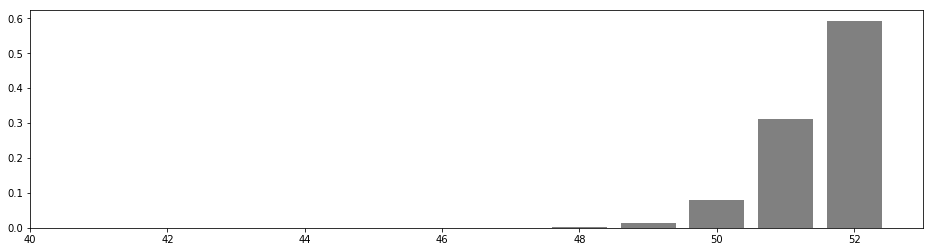

In [301]:
from scipy import stats 
binomial = stats.binom(52, .99)

fig, ax = plt.subplots(1, figsize=(16, 4))
bars = ax.bar(range(53), [binomial.pmf(i) for i in range(53)], align="center", color="grey")
ax.set_xlim(40, 53)

In [300]:
#Figuring out how many MVPS are in the top 10%
lst_mvp= []
for i in range(1970,2020):
    nfl_top_10 = nfl_gp[nfl_gp.Year == i].sort_values('FantPt', ascending = False).FantPt[:int(.1*len(nfl_gp[nfl_gp.Year == i]))].values
    mvp_FantPt= nfl_gp[(nfl_gp.Year == i) & (nfl_gp.mvp == True)].FantPt.values
    if len(mvp_FantPt) < 2: 
        if nfl_top_10.min() <= mvp_FantPt[0]:
            lst_mvp.append(1)
        else:
            lst_mvp.append(0)

    else:
        if nfl_top_10.min() <= mvp_FantPt[0]:
            lst_mvp.append(1)
        if nfl_top_10.min() <= mvp_FantPt[1]:
            lst_mvp.append(1)
        else:
            lst_mvp.append(0)

print(sum(lst_mvp))

51


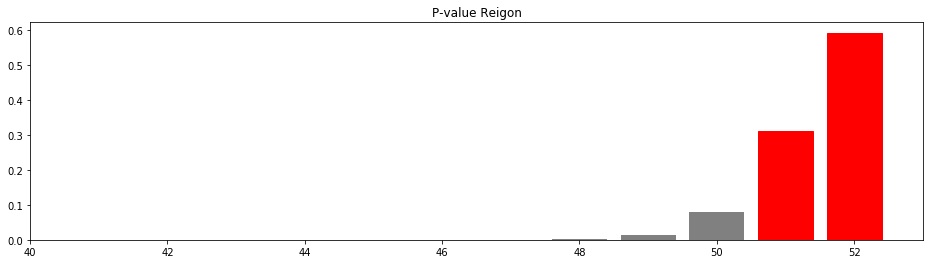

In [302]:
fig, ax = plt.subplots(1, figsize=(16, 4))
bars = ax.bar(range(53), [binomial.pmf(i) for i in range(53)], align="center", color="grey")
ax.set_xlim(40, 53)

for i in range(51, 53):
    bars[i].set_color('red')
    
_ = ax.set_title("P-value Reigon")

In [304]:
prob_equal_or_more_extreme = 1 - binomial.cdf(50)
print("Probability of Observing Data More Equal or More Extreme than Actual: {:2.2}".format(
    prob_equal_or_more_extreme))
print('P-value = 0.9', 'Alpha = 0.05', ' I do not reject the null hypothesis')

Probability of Observing Data More Equal or More Extreme than Actual: 0.9
P-value = 0.9 Alpha = 0.05  I do not reject the null hypothesis


### Next Hypothesis Test:
* Null Hypothesis = There is no difference between mean mvp performance and the mean performance of the top 10 percent
* Alternate Hypothesis= There is a difference, and it could go either way
* Alpha = 0.05
- I will be doing a Welsch T-Test on the mean mvp performance and the mean perfomance of top 10 percent of perfomance of each year going back to 1970

## NFL average MVP Performance vs Average Top 10 percent performance using FantPt Metric

In [356]:
mvp_FantPt_lst = nfl[nfl.mvp == True].FantPt.values
mean_mvp = mvp_FantPt_lst.mean()
mean_mvp
print(mvp_FantPt_lst)

[209. 150. 241. 279. 185. 217. 236. 308. 204. 293. 269. 284. 168. 272.
 361. 316. 273. 234. 258. 270. 252. 276. 302. 250. 354. 339. 318. 320.
 291. 361. 329. 381. 301. 300. 271. 253. 362. 364. 427. 398. 254. 279.
 301. 399. 307. 414. 358. 391. 355. 296. 417. 416.]


In [436]:
top_10_fantpt = []
for i in range(1970,2020):
    n = nfl_gp[nfl_gp.Year == i].sort_values('FantPt', ascending = False).FantPt[:int(.1*len(nfl_gp[nfl_gp.Year == i]))].values
    top_10_fantpt.append(n)
mean_top = []
for lst in top_10_fantpt:
    mean_top.append(lst.mean())
mean_top = np.array(mean_top)
mean_top_10 = mean_top.mean()
mean_top_10
mean_top2= list(mean_top.copy())
mean_top2.insert(28, mean_top[27])
mean_top2.insert(34, mean_top[33])
print(mean_top2[34:37])



# nfl['mvp'] = False
# for idx,row in nfl.iterrows():
#     for lst in mvp_lst:
#         if row['Player'] == lst[1] and row['Year'] == lst[0]:
#             nfl.loc[idx, 'mvp'] = True

[273.05263157894734, 273.05263157894734, 278.1666666666667]


In [523]:
print(mean_top)

[184.         171.21428571 201.42857143 193.07142857 191.64285714
 221.92857143 209.         189.53333333 206.05882353 239.9375
 238.1875     250.         155.33333333 256.9375     263.58823529
 246.58823529 240.8125     210.07142857 234.52941176 254.
 237.3125     229.4375     240.375      214.875      253.125
 273.94117647 249.35294118 248.11764706 266.82352941 251.88888889
 281.66666667 266.16666667 275.27777778 273.05263158 278.16666667
 258.66666667 263.31578947 262.         258.94117647 273.15789474
 264.83333333 296.66666667 292.64705882 286.77777778 291.
 298.61111111 293.66666667 275.76470588 309.55555556 297.52941176]


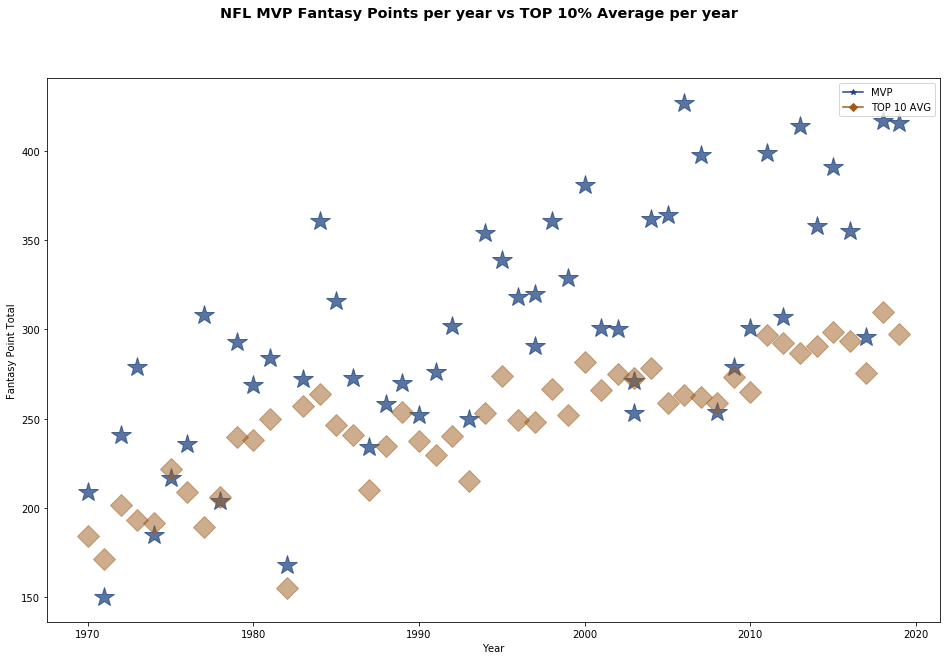

In [543]:
from matplotlib.lines import Line2D
fig, ax = plt.subplots(1,1, figsize=(16,10))
def graph_mvp_top_avg(mvp, top_10, nfl_mvp_years, ax):
    # y1 = mvp_FantPt_lst
    # x1= nfl_mvp_years
    # ax.plot(x1, y1, marker = '*', markersize= 20, ls= '')
    for idx, val in enumerate(nfl_mvp_years):
        y1 = mvp[idx]
        x1 = val
        ax.plot(x1, y1, marker = '*', markersize= 20, ls= '', c = '#214580', alpha= 0.75)
    counter = 0
    for lst in top_10:
        y2 = lst.mean()
        x2= 1970 + counter
        ax.plot(x2, y2, marker = 'D', markersize= 15, c = '#9c5c1c', alpha = 0.5)
        counter+= 1

graph_mvp_top_avg(mvp_FantPt_lst, mean_top, nfl_mvp_years, ax)

legend_elements = [Line2D([], [], color='#214580', marker = '*', label='MVP'),
                   Line2D([], [], marker='D', color='#9c5c1c', label='TOP 10 AVG')]

ax.set_xlabel('Year')
ax.set_ylabel('Fantasy Point Total')
fig.suptitle('NFL MVP Fantasy Points per year vs TOP 10% Average per year', fontweight = 'bold', fontsize = 'x-large')
#sns.scatterplot(mean_top2, mvp_FantPt_lst, ax= ax[0])
#ax[0].set_ylabel('MVP Totals')
#ax[0].set_xlabel('TOP 10 Avg')
ax.legend(handles=legend_elements)

In [344]:
# run Welch's T-Test
stat, p_val = stats.ttest_ind(mean_top, mvp_FantPt_lst, equal_var=False)

print('The statistic is: {} \nP-value: {}'.format(stat ,p_val))

The statistic is: -5.013135591126438 
P-value: 3.189506923486184e-06


In [349]:
def welch_test_statistic(sample_1, sample_2):
    numerator = np.mean(sample_1) - np.mean(sample_2)
    denominator_sq = (np.var(sample_1) / len(sample_1)) + \
                        (np.var(sample_2) / len(sample_2))
    return numerator / np.sqrt(denominator_sq)

def welch_satterhwaithe_df(sample_1, sample_2):
    ss1 = len(sample_1)
    ss2 = len(sample_2)
    df = (
        ((np.var(sample_1)/ss1 + np.var(sample_2)/ss2)**(2.0)) / 
        ((np.var(sample_1)/ss1)**(2.0)/(ss1 - 1) + (np.var(sample_2)/ss2)**(2.0)/(ss2 - 1))
    )
    return df
test = welch_test_statistic(mean_top, mvp_FantPt_lst)
deg_free = welch_satterhwaithe_df(mean_top, mvp_FantPt_lst)
print(test, deg_free)

-5.062512143981697 79.34626688472606


Text(0.5, 1.0, "Distribution of Welsh's Test Statistic Under the Null Hypothesis")

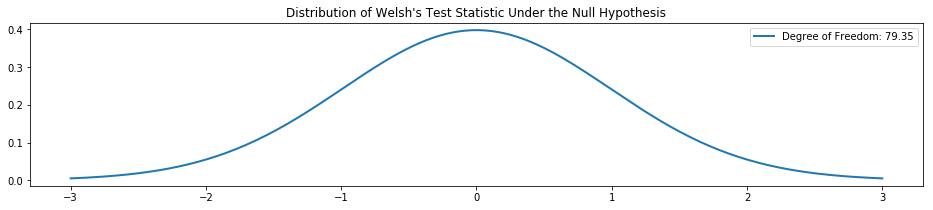

In [346]:
x = np.linspace(-3, 3, num=250)

fig, ax = plt.subplots(1, figsize=(16, 3))
students = stats.t(deg_free)
ax.plot(x, students.pdf(x), linewidth=2, label="Degree of Freedom: {:2.2f}".format(deg_free))
ax.legend()
ax.set_title("Distribution of Welsh's Test Statistic Under the Null Hypothesis")

p-value for different average performance between MVP and Top 10 percent: 0.00000262


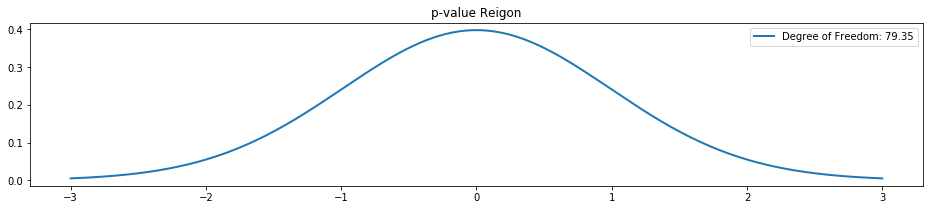

In [353]:
x = np.linspace(-3, 3, num=250)

fig, ax = plt.subplots(1, figsize=(16, 3))
students = stats.t(deg_free)
ax.plot(x, students.pdf(x), linewidth=2, label="Degree of Freedom: {:2.2f}".format(deg_free))
_ = ax.fill_between(x, students.pdf(x), where=(x >= -test), color="red", alpha=0.25)
_ = ax.fill_between(x, students.pdf(x), where=(x <= test), color="red", alpha=0.25)
ax.legend()
ax.set_title("p-value Reigon");


p_value = students.cdf(test) + (1 - students.cdf(-test))
print("p-value for different average performance between MVP and Top 10 percent: {:2.8f}".format(p_value))

In [351]:
test_2 = welch_test_statistic(mvp_FantPt_lst, mean_top)

p_value = 1 - students.cdf(test_2)
print("p-value for average MVP performance greater than average top 10 percentile performance: {:2.6f}".format(p_value))

p-value for average MVP performance greater than average top 10 percentile performance: 0.000001


In [511]:
#nba_gp = nba_gp[['Player', 'Pos', 'Tm', 'G', 'GS', 'Year', 'FantPt', 'FPPG', 'mvp']]
nba_mvp_FantPt_lst = nba[nba.mvp == True].sort_values('Year').FantPt.values
nba_mean_mvp = mvp_FantPt_lst.mean()
nba_mean_mvp
print(nba_mvp_FantPt_lst)



[5024.5 2864.7 4252.3 4439.7 4042.4 4467.6 3966.3 4045.2 4534.9 4301.5
 4201.3 5052.3 4108.4 3960.9 4565.9 4321.7 3981.1 4764.5 4599.4 4139.6
 4021.8 3724.5 2129.1 4688.1 3379.1 4328.9 4237.6 4649.3 2750.3 3070.6
 3317.1 3920.9 4369.1 4244.3 3486.5 3135.9 3956.5 4179.1 3525.7 3971.5
 4905.8 3815.8 4045.6]


In [512]:
nba_top_10_fantpt = []
for i in range(1977,2020):
    n = nba_gp[nba_gp.Year == i].sort_values('FantPt', ascending = False).FantPt[:int(.1*len(nba_gp[nba_gp.Year == i]))].values
    nba_top_10_fantpt.append(n)
nba_mean_top = []
for lst in nba_top_10_fantpt:
    nba_mean_top.append(lst.mean())
nba_mean_top = np.array(nba_mean_top)
nba_mean_top_10 = nba_mean_top.mean()
print(nba_mean_top_10)
print(nba_mean_top)


3204.7783339177536
[3582.00833333 3345.15217391 3408.83636364 3350.40909091 3270.64166667
 3357.32083333 3329.08333333 3283.86       3417.5        3296.35416667
 3512.192      3503.95       3516.07037037 3519.67857143 3416.69655172
 3404.81724138 3421.02068966 3381.30714286 3235.61333333 3194.09354839
 3232.3        3070.80645161 2043.9047619  3211.4483871  3304.38709677
 3198.87096774 3287.85483871 3043.43225806 3129.20625    3248.625
 3009.7        3218.48387097 3028.371875   3079.7875     3033.06060606
 2397.64827586 2950.03235294 3042.03333333 2892.18529412 3103.01470588
 3196.06470588 3098.62727273 3239.01714286]


[]

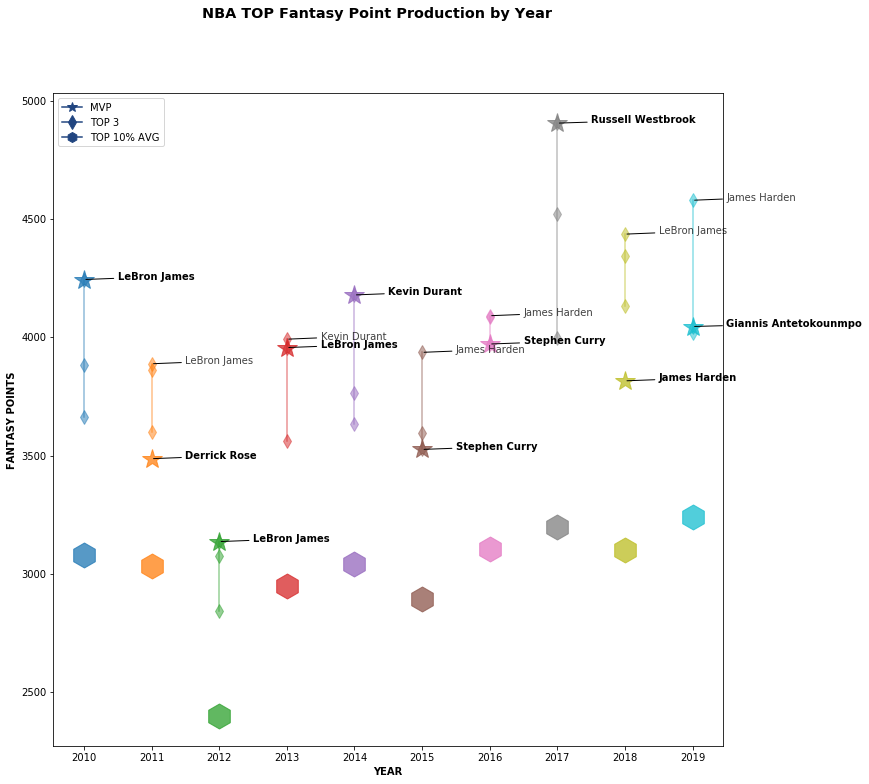

In [546]:
#Top 3 values
#nfl_gp[nfl_gp.Year == 2019][['Player', 'Year', 'FantPt']].sort_values('FantPt', ascending = False)[0:3]['Player'].values
#MVP values
#nfl_gp[(nfl_gp.Year == i) & (nfl_gp.mvp == True)].FantPt.values
#MVP Average each year
#mean_top2

fig, ax = plt.subplots(figsize=(12,12))
legend_elements = [Line2D([], [], markersize = 10, color='#214580', marker = '*', label='MVP'),
                   Line2D([], [], markersize = 10, marker='d', color='#214580', label='TOP 3'),
                   Line2D([], [], markersize = 10, marker='h', color='#214580', label='TOP 10% AVG')]
for i in range(2010, 2020):
    y = nba_gp[nba_gp.Year == i][['Player', 'Year', 'FantPt']].sort_values('FantPt', ascending = False)[0:3]['FantPt'].values
    x= [i] * len(y)
    ax.plot(x, y, marker = 'd', markersize= 10, alpha = 0.5)
years_2010 = [i for i in range(2010,2020)]
for idx, n in enumerate(nba_mean_top[-10:]):
    y = n 
    x = years_2010[idx]
    ax.plot(x,y, marker = 'h', markersize = 25, alpha = 0.75)

for i in range(2010, 2020):
    y = nba_gp[(nba_gp.Year == i) & (nba_gp.mvp == True)].FantPt.values
    x= i
    ax.plot(x, y, marker = '*', markersize= 20, alpha = 0.75)
    ax.annotate(nba_gp[(nba_gp.Year == i) & (nba_gp.mvp == True)].Player.values[0], xy=(x, y), xytext=(x+0.5, y -1),
                arrowprops={'arrowstyle' : '-'}, fontweight = 'bold')

for i in [2011, 2013, 2015, 2016, 2018, 2019]:
    y = nba_gp[nba_gp.Year == i][['Player', 'Year', 'FantPt']].sort_values('FantPt', ascending = False)[0:3]['FantPt'].values[0]
    x = i
    ax.annotate(nba_gp[nba_gp.Year == i][['Player', 'Year', 'FantPt']].sort_values('FantPt', ascending = False)[0:3]['Player'].values[0], xy=(x, y), xytext= (x + 0.5, y -1),
                arrowprops={'arrowstyle' : '-'}, alpha = 0.75)


ax.legend(handles=legend_elements, loc = 'upper left')
fig.suptitle('NBA TOP Fantasy Point Production by Year', fontweight = 'bold', fontsize = 'x-large')
ax.set_xlabel('YEAR', fontweight = 'bold')
ax.set_ylabel('FANTASY POINTS', fontweight = 'bold')
ax.set_xticks([2010,2011,2012,2013,2014,2015,2016,2017,2018,2019])
ax.set_xticklabels(['2010','2011','2012','2013','2014','2015','2016','2017','2018','2019'], minor = True)

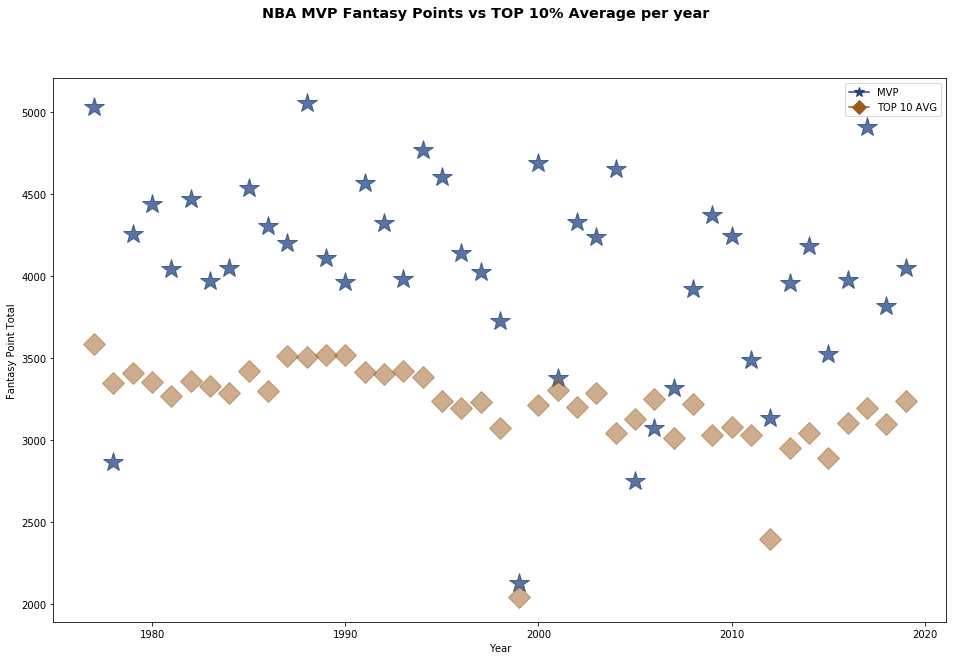

In [545]:
fig, ax = plt.subplots(figsize=(16,10))
def graph_nba_mvp_top_avg(mvp, top_10, nfl_mvp_years, ax):
    # y1 = mvp_FantPt_lst
    # x1= nfl_mvp_years
    # ax.plot(x1, y1, marker = '*', markersize= 20, ls= '')
    for idx, val in enumerate(nfl_mvp_years):
        y1 = mvp[idx]
        x1 = val
        ax.plot(x1, y1, marker = '*', markersize= 20, ls= '', c = '#214580', alpha= 0.75)
    counter = 0
    for lst in top_10:
        y2 = lst.mean()
        x2= 1977 + counter
        ax.plot(x2, y2, marker = 'D', markersize= 15, c = '#9c5c1c', alpha = 0.5)
        counter+= 1

graph_nba_mvp_top_avg(nba_mvp_FantPt_lst, nba_mean_top, nba_mvp_years, ax)

legend_elements = [Line2D([], [], markersize= 10, color='#214580', marker = '*', label='MVP'),
                   Line2D([], [], markersize= 10, marker='D', color='#9c5c1c', label='TOP 10 AVG')]

ax.set_xlabel('Year')
ax.set_ylabel('Fantasy Point Total')
fig.suptitle('NBA MVP Fantasy Points vs TOP 10% Average per year', fontweight = 'bold', fontsize = 'x-large')
#sns.scatterplot(nba_mean_top, nba_mvp_FantPt_lst, ax= ax[0])
#ax[0].set_ylabel('MVP Totals')
#ax[0].set_xlabel('TOP 10 Avg')
ax.legend(handles=legend_elements)

array([3582.00833333, 3345.15217391, 3408.83636364, 3350.40909091,
       3270.64166667, 3357.32083333, 3329.08333333, 3283.86      ,
       3417.5       , 3296.35416667, 3512.192     , 3503.95      ,
       3516.07037037, 3519.67857143, 3416.69655172, 3404.81724138,
       3421.02068966, 3381.30714286, 3235.61333333, 3194.09354839,
       3232.3       , 3070.80645161, 2043.9047619 , 3211.4483871 ,
       3304.38709677, 3198.87096774, 3287.85483871, 3043.43225806,
       3129.20625   , 3248.625     , 3009.7       , 3218.48387097,
       3028.371875  , 3079.7875    , 3033.06060606, 2397.64827586,
       2950.03235294, 3042.03333333, 2892.18529412, 3103.01470588,
       3196.06470588, 3098.62727273, 3239.01714286])

### Just for fun, I want to graph a career archetype in relation to FP production by years in the league for each position. 

In [305]:
print(nfl.columns) 
nfl.FantPos.value_counts()

Index(['2PM', '2PP', 'Age', 'Att', 'Att.1', 'Cmp', 'DKPt', 'FDPt', 'FL',
       'FantPos', 'FantPt', 'Fmb', 'G', 'GS', 'Int', 'PPR', 'Player',
       'PosRank', 'Rec', 'TD', 'TD.1', 'TD.2', 'TD.3', 'Tgt', 'Tm', 'VBD',
       'Y/A', 'Y/R', 'Yds', 'Yds.1', 'Yds.2', 'Year', 'mvp'],
      dtype='object')


RB    7767
WR    7641
TE    4053
QB    3683
?     2983
Name: FantPos, dtype: int64

In [9]:
#will need to go check their positions 
players_w_fp_nopos = nfl[nfl.FantPos == '?'][['Player', 'FantPos', 'Tm', 'G', 'GS', 'FantPt', 'Year']].sort_values('FantPt', ascending = False).head(14)
players_w_fp_nopos.iloc[0,1] = 'RB'
players_w_fp_nopos

Player FantPos   Tm     G    GS  FantPt  Year
17089      Mike Anderson      RB  DEN  15.0  15.0   201.0  2005
19440       Chad Johnson       ?  CIN  16.0  15.0   162.0  2009
20089       Chad Johnson       ?  CIN  14.0  12.0   107.0  2010
14835      Desmond Clark       ?  DEN  16.0   4.0    93.0  2001
18403        Kolby Smith       ?  KAN  16.0   6.0    68.0  2007
15646        Terry Jones       ?  BAL  14.0   6.0    17.0  2002
14845        Tony Carter       ?  DEN  16.0   6.0     9.0  2001
15733   Woodrow Dantzler       ?  DAL   5.0   0.0     4.0  2002
16344  Stephen Alexander       ?  SDG   3.0   0.0     2.0  2003
7989        Chris Kelley       ?  CLE   2.0   0.0     2.0  1987
12514      John Farquhar       ?  2TM   5.0   0.0     2.0  1996
19854        James Davis       ?  CLE   2.0   0.0     2.0  2009
22897        Kiero Small       ?  2TM   3.0   3.0     2.0  2014
18305      Reagan Maui'a       ?  MIA  16.0   9.0     1.0  2007

In [10]:
nfl[nfl.G == 0][['Player', 'Tm', 'Year', 'FantPt']].sort_values('FantPt', ascending = False)

Player   Tm  Year  FantPt
1114       Barry Pearson  PIT  1972     0.0
22990     Xavier Grimble  2TM  2014     0.0
22994        Andre Hardy  ARI  2014     0.0
22995   Chandler Harnish  MIN  2014     0.0
22996       Chris Harper  NYG  2014     0.0
22998      Travis Harvey  3TM  2014     0.0
22999     Micah Hatfield  SDG  2014     0.0
23000         Matt Hazel  MIA  2014     0.0
23001       Michael Hill  3TM  2014     0.0
23002       Stephen Hill  CAR  2014     0.0
23003       Caleb Holley  BUF  2014     0.0
23004      Emil Igwenagu  DET  2014     0.0
23006       Chuck Jacobs  SFO  2014     0.0
23007       Greg Jenkins  OAK  2014     0.0
23009       Josh Johnson  SFO  2014     0.0
23011       Kadeem Jones  STL  2014     0.0
23012       Landry Jones  PIT  2014     0.0
23013       Marvin Jones  CIN  2014     0.0
23014         T.J. Jones  DET  2014     0.0
23015         Mike Kafka  TAM  2014     0.0
23016          Nick Kasa  OAK  2014     0.0
23017         G.J. Kinne  PHI  2014     0.0
23018     Travis Labhart  HOU  2014     0.0
23019      Ryan Lankford  IND  2014     0.0
23020   Marcus Lattimore  SFO  2014     0.0
23022         Alec Lemon  BAL  2014     0.0
23023          Josh Lenz  IND  2014     0.0
23024        Lance Lewis  SFO  2014     0.0
23026       Arthur Lynch  MIA  2014     0.0
23028   Mario Manningham  NYG  2014     0.0
...                  ...  ...   ...     ...
21761       Adam Nissley  ATL  2012     0.0
21741   Ricardo Lockette  SFO  2012     0.0
21742         Lance Long  DET  2012     0.0
21744         Jeff Maehl  HOU  2012     0.0
21747        Josh McCown  CHI  2012     0.0
21751      Davin Meggett  IND  2012     0.0
21752        Kerry Meier  ATL  2012     0.0
21753      Lonyae Miller  BAL  2012     0.0
21754        Devin Moore  DET  2012     0.0
21755       Kashif Moore  2TM  2012     0.0
21756       Kellen Moore  DET  2012     0.0
21757     Cameron Morrah  SEA  2012     0.0
21758          Dale Moss  CHI  2012     0.0
21759         Derek Moye  PIT  2012     0.0
21765      Jordan Palmer  JAX  2012     0.0
21785      Mickey Shuler  OAK  2012     0.0
21767  Deangelo Peterson  WAS  2012     0.0
21769      Royce Pollard  NYJ  2012     0.0
21770       Tauren Poole  CAR  2012     0.0
21771       Taylor Price  JAX  2012     0.0
21772    Andrew Quarless  GNB  2012     0.0
21773      Richard Quinn  CIN  2012     0.0
21774       Bobby Rainey  BAL  2012     0.0
21775          Bert Reed  PIT  2012     0.0
21777   Gerrell Robinson  ARI  2012     0.0
21778      James Rodgers  ATL  2012     0.0
21779     Nelson Rosario  CAR  2012     0.0
21780      Martin Rucker  KAN  2012     0.0
21783       Tray Session  OAK  2012     0.0
25454       Hunter Henry  LAC  2018     0.0

[260 rows x 4 columns]

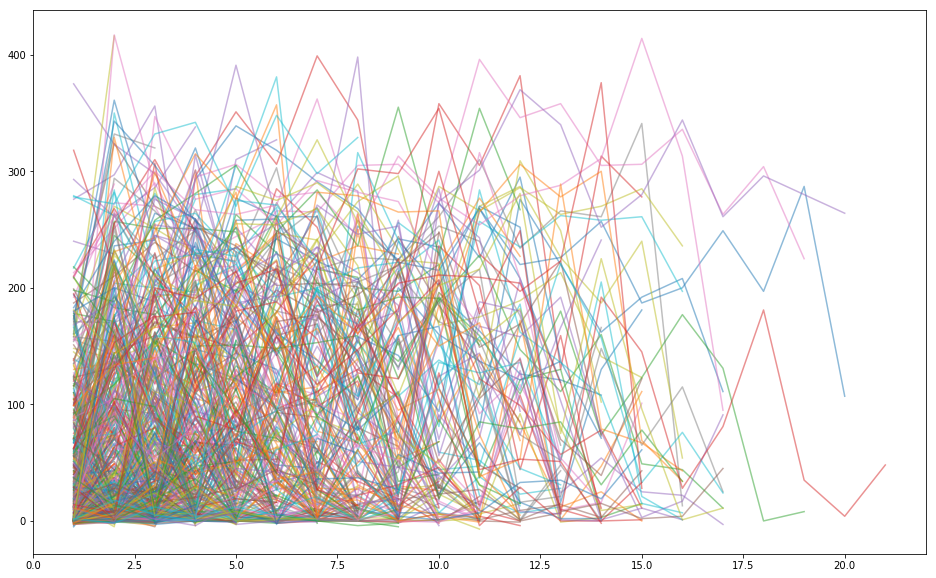

In [11]:
nfl_cleaner = nfl[nfl.G != 0]
qb = nfl_cleaner[nfl_cleaner.FantPos == 'QB']
gb = qb[['Player', 'Year', 'FantPt']].sort_values('Year').groupby(['Player'])
row_data = []
for row in gb:
    row_data.append(row[1]['FantPt'].values)
fig, ax = plt.subplots(figsize= (16,10))
for row in row_data:
    val_lst = []
    idx_lst = []
    for idx, val in enumerate(row):
        val_lst.append(val)
        idx_lst.append(idx + 1)
    ax.plot(idx_lst, val_lst, alpha = 0.5)

# ax.plot(qb['Year'], qb['FantPt'], alpha= 0.5)

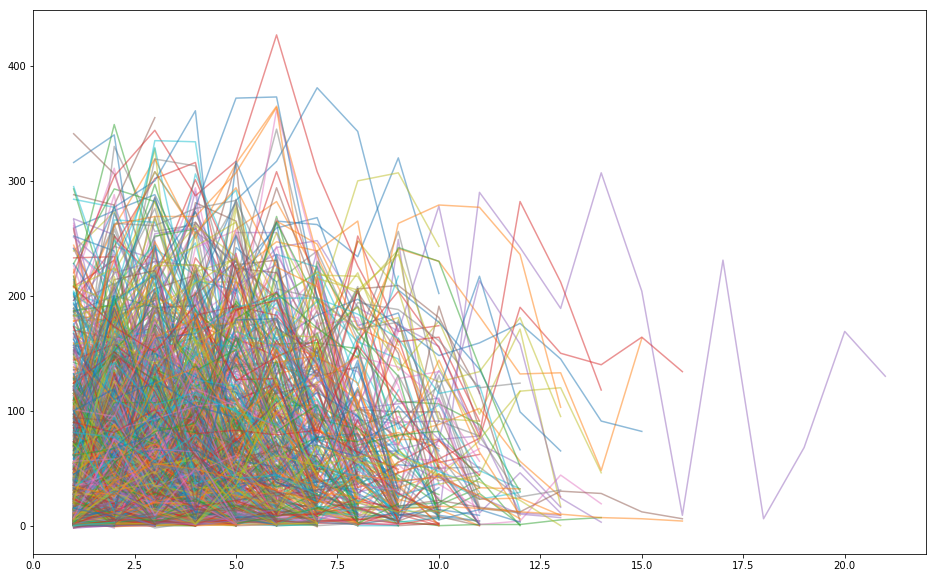

In [12]:
rb = nfl_cleaner[nfl_cleaner.FantPos == 'RB']
gb = rb[['Player', 'Year', 'FantPt']].sort_values('Year').groupby(['Player'])
row_data = []
for row in gb:
    row_data.append(row[1]['FantPt'].values)
fig, ax = plt.subplots(figsize= (16,10))
for row in row_data:
    val_lst = []
    idx_lst = []
    for idx, val in enumerate(row):
        val_lst.append(val)
        idx_lst.append(idx + 1)
    ax.plot(idx_lst, val_lst, alpha = 0.5)

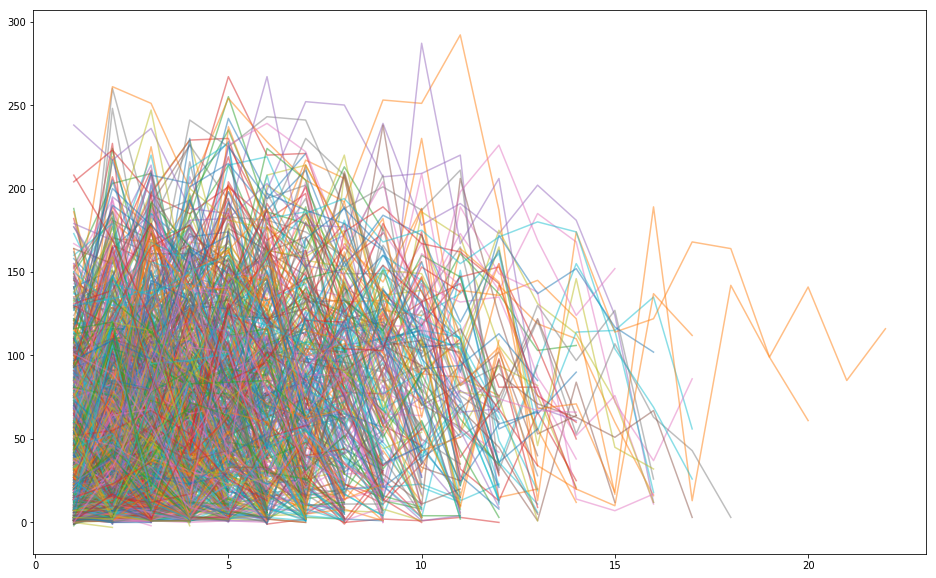

In [13]:
wr = nfl_cleaner[nfl_cleaner.FantPos == 'WR']
gb = wr[['Player', 'Year', 'FantPt']].sort_values('Year').groupby(['Player'])
row_data = []
for row in gb:
    row_data.append(row[1]['FantPt'].values)
fig, ax = plt.subplots(figsize= (16,10))
for row in row_data:
    val_lst = []
    idx_lst = []
    for idx, val in enumerate(row):
        val_lst.append(val)
        idx_lst.append(idx + 1)
    ax.plot(idx_lst, val_lst, alpha = 0.5)